In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read file csv
df = pd.read_csv('./Data/Mall_Customers.csv')
#print first 5 rows in dataframe
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Show info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#Description statistic dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [5]:
#Encoding categorical features
scale_gender = {
    'Female': 1,
    'Male': 0
}

df['Gender'].replace(scale_gender, inplace=True)

In [6]:
#Remove column CustomerID
df.drop('CustomerID', axis=1, inplace=True)

In [7]:
X = df.to_numpy()
X[0:5]

array([[ 0, 19, 15, 39],
       [ 0, 21, 15, 81],
       [ 1, 20, 16,  6],
       [ 1, 23, 16, 77],
       [ 1, 31, 17, 40]], dtype=int64)

In [42]:
#Kmeans Clustering algorithm implemention
class KMeansCluster:
    
    
    def __init__(self, X, k):
        self.X = X
        self.k = k
        
    def initialize_central(self):
        idx_random = np.random.choice(self.X.shape[0], self.k, replace=False)
        return self.X[idx_random]
    
    def calc_distance(self, x, y):
        return np.sqrt(np.sum((x - y)**2, axis=1))
    
    def assign_label(self):
        self.X_tagged = {}
        labels = []
        for x in self.X.tolist():
            cluster = np.argmin(self.calc_distance(x, self.central))
            labels.append(cluster)
            try:
                self.X_tagged[cluster].append(x)
            except KeyError:
                self.X_tagged[cluster] = [x]
        return labels
    
    def update_central(self):
        self.central = [np.mean(x, axis=0) for x in list(self.X_tagged.values())]
        return np.array(self.central)
    
    def calc_kmeans(self):
        self.central = self.initialize_central()
        pre_labels = None
        while True:
            labels = self.assign_label()
            if pre_labels == labels:
                break
            pre_labels = labels.copy()
            self.central = self.update_central()   
        
        self.X_new = np.c_[self.X, np.array(labels)] 
        self.labels_ = labels
        return None

In [44]:
kmeans = KMeansCluster(X, 3)
kmeans.calc_kmeans()
kmeans.central

array([[ 0.59349593, 40.32520325, 44.15447154, 49.82926829],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513],
       [ 0.47368421, 40.39473684, 87.        , 18.63157895]])

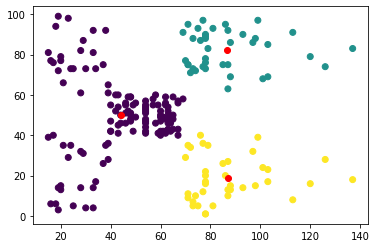

In [46]:
fig, axs = plt.subplots()
axs.scatter(X[:, -2], X[:, -1], c=kmeans.labels_)
axs.scatter(kmeans.central[:, -2], kmeans.central[:, -1], c="r")
plt.show()

In [14]:
df_tagged = pd.DataFrame(kmeans.X_new, columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Label'])
df_tagged

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,0
3,1,23,16,77,0
4,1,31,17,40,0
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,2
197,0,32,126,74,1
198,0,32,137,18,2


---

In [15]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [16]:
center = kmeans.cluster_centers_
center

array([[ 0.47368421, 40.39473684, 87.        , 18.63157895],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513],
       [ 0.59349593, 40.32520325, 44.15447154, 49.82926829]])

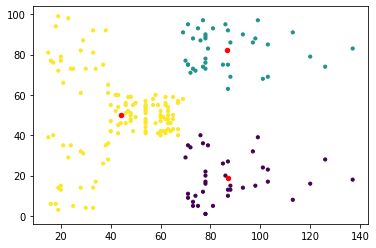

In [17]:
fig, axs = plt.subplots()
axs.scatter(X[:, -2], X[:, -1], s=10, c=kmeans.labels_)
axs.scatter(center[:, -2], center[:, -1], s=20, c="r")